In [1]:
#Import the required modules and libraries.

from array import array
import itertools
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import numpy as np
import pandas as pd
import os.path
from matplotlib.ticker import NullFormatter

#This line is important. On this server I don't know if we have the ability to output plots. This is a solution.

%matplotlib inline

#Importing root_pandas and root_numpy.

import sys
sys.path.insert(0,'/usr/common/software/rootpy/')
import root_numpy
import root_pandas as rpd
import ROOT
from root_pandas import read_root

Welcome to ROOTaaS 6.06/06


In [2]:
def getWeights(filename,dataframe):
    
    if('Skimmed_17g6a1_pthat1' in filename):
        dataframe.eval('weights = 1.60*10**(-11)',inplace=True)
    elif('Skimmed_17g6a1_pthat2' in filename):
        dataframe.eval('weights = 2.72*10**(-12)',inplace=True)
    elif('Skimmed_17g6a1_pthat3' in filename):
        dataframe.eval('weights = 3.69*10**(-13)',inplace=True)
    elif('Skimmed_17g6a1_pthat4' in filename):
        dataframe.eval('weights = 6.14*10**(-14)',inplace=True)
    elif('Skimmed_17g6a1_pthat5' in filename):
        dataframe.eval('weights = 1.27*10**(-14)',inplace=True)
    
    elif('Skimmed_17g6a3_pthat1' in filename):
        dataframe.eval('weights = 4.47*10**(-11)',inplace=True)
    elif('Skimmed_17g6a3_pthat2' in filename):
        dataframe.eval('weights = 9.83*10**(-11)',inplace=True)
    elif('Skimmed_17g6a3_pthat3' in filename):
        dataframe.eval('weights = 1.04*10**(-10)',inplace=True)
    elif('Skimmed_17g6a3_pthat4' in filename):
        dataframe.eval('weights = 1.01*10**(-10)',inplace=True)
    elif('Skimmed_17g6a3_pthat5' in filename):
        dataframe.eval('weights = 6.93*10**(-11)',inplace=True)
    
    else:
        dataframe.eval('weights = eg_cross_section/eg_ntrial',inplace=True)
        
    return dataframe

In [3]:
def getJet04(inputFiles):
    
    scalarColumns = []
    scalarColumns.append('eg_cross_section')
    scalarColumns.append('eg_ntrial')
    scalarColumns.append('ue_estimate_its_const')

    arrayColumns = []
    arrayColumns.append('jet_ak04its_pt_raw')
    arrayColumns.append('jet_ak04its_eta_raw')
    arrayColumns.append('jet_ak04its_area_raw')
    arrayColumns.append('jet_ak04its_pt_raw_ue')
    arrayColumns.append('jet_ak04its_pt_truth')
    arrayColumns.append('jet_ak04its_eta_truth')

    columns = scalarColumns + arrayColumns

    dfs = []
    for inputFile in inputFiles:
        start = time.time()
        filename = os.path.basename(inputFile)
        dataframe = rpd.read_root(inputFile,columns=columns,flatten=arrayColumns)
        end = time.time()
        getWeights(filename,dataframe)
        print 'Processed {0} in {1} seconds'.format(filename,end - start)
        dfs.append(dataframe)

    return pd.concat(dfs).drop_duplicates().reset_index(drop=True)

In [4]:
def getJet03(inputFiles):
    
    scalarColumns = []
    scalarColumns.append('eg_cross_section')
    scalarColumns.append('eg_ntrial')
    scalarColumns.append('ue_estimate_its_const')

    arrayColumns = []
    arrayColumns.append('jet_ak03its_pt_raw')
    arrayColumns.append('jet_ak03its_eta_raw')
    arrayColumns.append('jet_ak03its_area_raw')
    arrayColumns.append('jet_ak03its_pt_raw_ue')
    arrayColumns.append('jet_ak03its_pt_truth')
    arrayColumns.append('jet_ak03its_eta_truth')

    columns = scalarColumns + arrayColumns

    dfs = []
    for inputFile in inputFiles:
        start = time.time()
        filename = os.path.basename(inputFile)
        dataframe = rpd.read_root(inputFile,columns=columns,flatten=arrayColumns)
        end = time.time()
        getWeights(filename,dataframe)
        print 'Processed {0} in {1} seconds'.format(filename,end - start)
        dfs.append(dataframe)

    return pd.concat(dfs).drop_duplicates().reset_index(drop=True)

In [5]:
#####Read the root files and construct dataframes with the data outlined in the cells above (due to dimensionality)#####

mc_18b10a_files = ['Skimmed_18b10a_pthat1to6.root']
mc_18b10a_04= getJet04(mc_18b10a_files)
mc_18b10a_03= getJet03(mc_18b10a_files)

mc_17g6a1_files = ['Skimmed_17g6a1_pthat1_ptmin12.0_Nevent_300000.root','Skimmed_17g6a1_pthat2_ptmin12.0_Nevent_300000.root','Skimmed_17g6a1_pthat3_ptmin12.0_Nevent_300000.root','Skimmed_17g6a1_pthat4_ptmin12.0_Nevent_300000.root','Skimmed_17g6a1_pthat5_ptmin12.0_Nevent_300000.root']
mc_17g6a1_04= getJet04(mc_17g6a1_files)
mc_17g6a1_03= getJet03(mc_17g6a1_files)

Processed Skimmed_18b10a_pthat1to6.root in 27.1454811096 seconds
Processed Skimmed_18b10a_pthat1to6.root in 19.8198549747 seconds
Processed Skimmed_17g6a1_pthat1_ptmin12.0_Nevent_300000.root in 1.39452195168 seconds
Processed Skimmed_17g6a1_pthat2_ptmin12.0_Nevent_300000.root in 9.27493810654 seconds
Processed Skimmed_17g6a1_pthat3_ptmin12.0_Nevent_300000.root in 14.4675300121 seconds
Processed Skimmed_17g6a1_pthat4_ptmin12.0_Nevent_300000.root in 13.5743300915 seconds
Processed Skimmed_17g6a1_pthat5_ptmin12.0_Nevent_300000.root in 3.15335011482 seconds
Processed Skimmed_17g6a1_pthat1_ptmin12.0_Nevent_300000.root in 1.29338407516 seconds
Processed Skimmed_17g6a1_pthat2_ptmin12.0_Nevent_300000.root in 7.16478490829 seconds
Processed Skimmed_17g6a1_pthat3_ptmin12.0_Nevent_300000.root in 13.2001879215 seconds
Processed Skimmed_17g6a1_pthat4_ptmin12.0_Nevent_300000.root in 11.8640091419 seconds
Processed Skimmed_17g6a1_pthat5_ptmin12.0_Nevent_300000.root in 2.40963888168 seconds


In [6]:
def applyCut(inputDataframe, cut, text=None):
    nbeforecut = inputDataframe.shape[0]
    cutDataframe = inputDataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*cutDataframe.shape[0]/float(nbeforecut))
    return cutDataframe

In [7]:
def applyCuts04(fullDataframe,name='default'):  
    
    dataframe = fullDataframe
    dataframe = applyCut(dataframe, 'jet_ak04its_pt_raw>5','jet pt raw > 5 GeV:')
    dataframe = applyCut(dataframe, 'abs(jet_ak04its_eta_raw)<0.5','|eta raw| < 0.5:')
    dataframe = applyCut(dataframe, 'abs(jet_ak04its_eta_truth)<0.5','|eta truth| < 0.5:')

    return dataframe

In [8]:
def applyCuts03(fullDataframe,name='default'):  
    
    dataframe = fullDataframe
    dataframe = applyCut(dataframe,'jet_ak03its_pt_raw>5','jet pt raw > 5 GeV:')
    dataframe = applyCut(dataframe,'abs(jet_ak03its_eta_raw)<0.5','|eta raw| < 0.5:')
    dataframe = applyCut(dataframe,'abs(jet_ak03its_eta_truth)<0.5','|eta truth| < 0.5:')

    return dataframe

In [9]:
#####Apply cuts to the data in the dataframes#####

mc_18b10a_Hists_04 = applyCuts04(mc_18b10a_04)
print '\n'
mc_18b10a_Hists_03 = applyCuts03(mc_18b10a_03)
print '\n'
mc_17g6a1_Hists_04 = applyCuts04(mc_17g6a1_04)
print '\n'
mc_17g6a1_Hists_03 = applyCuts03(mc_17g6a1_03)

jet pt raw > 5 GeV: 291888  fraction kept: 4.3
|eta raw| < 0.5: 161005  fraction kept: 55.2
|eta truth| < 0.5: 155964  fraction kept: 96.9


jet pt raw > 5 GeV: 278656  fraction kept: 3.6
|eta raw| < 0.5: 155198  fraction kept: 55.7
|eta truth| < 0.5: 150319  fraction kept: 96.9


jet pt raw > 5 GeV: 399715  fraction kept: 3.0
|eta raw| < 0.5: 207008  fraction kept: 51.8
|eta truth| < 0.5: 190098  fraction kept: 91.8


jet pt raw > 5 GeV: 367855  fraction kept: 2.2
|eta raw| < 0.5: 193230  fraction kept: 52.5
|eta truth| < 0.5: 177268  fraction kept: 91.7


In [10]:
##########Make multiple pt truth bins for R=0.4 in pp data##########

mc_18b10a_Hists_04_pt_8  = mc_18b10a_Hists_04.query('jet_ak04its_pt_truth > 8 and  jet_ak04its_pt_truth < 10')
mc_18b10a_Hists_04_pt_10 = mc_18b10a_Hists_04.query('jet_ak04its_pt_truth > 10 and jet_ak04its_pt_truth < 12')
mc_18b10a_Hists_04_pt_14 = mc_18b10a_Hists_04.query('jet_ak04its_pt_truth > 14 and jet_ak04its_pt_truth < 16')
mc_18b10a_Hists_04_pt_20 = mc_18b10a_Hists_04.query('jet_ak04its_pt_truth > 20 and jet_ak04its_pt_truth < 24')

##########Make pt resolution variable##########

mc_18b10a_Hists_04_pt_8.eval( 'jet_ak04its_pt_resol=100*(jet_ak04its_pt_raw-jet_ak04its_pt_truth)/jet_ak04its_pt_truth',inplace=True);
mc_18b10a_Hists_04_pt_10.eval('jet_ak04its_pt_resol=100*(jet_ak04its_pt_raw-jet_ak04its_pt_truth)/jet_ak04its_pt_truth',inplace=True);
mc_18b10a_Hists_04_pt_14.eval('jet_ak04its_pt_resol=100*(jet_ak04its_pt_raw-jet_ak04its_pt_truth)/jet_ak04its_pt_truth',inplace=True);
mc_18b10a_Hists_04_pt_20.eval('jet_ak04its_pt_resol=100*(jet_ak04its_pt_raw-jet_ak04its_pt_truth)/jet_ak04its_pt_truth',inplace=True);

##########Make multiple pt truth bins for R=0.4 in p+Pb data##########

mc_17g6a1_Hists_04_pt_8  = mc_17g6a1_Hists_04.query('jet_ak04its_pt_truth > 8 and  jet_ak04its_pt_truth < 10')
mc_17g6a1_Hists_04_pt_10 = mc_17g6a1_Hists_04.query('jet_ak04its_pt_truth > 10 and jet_ak04its_pt_truth < 12')
mc_17g6a1_Hists_04_pt_14 = mc_17g6a1_Hists_04.query('jet_ak04its_pt_truth > 14 and jet_ak04its_pt_truth < 16')
mc_17g6a1_Hists_04_pt_20 = mc_17g6a1_Hists_04.query('jet_ak04its_pt_truth > 20 and jet_ak04its_pt_truth < 24')

##########Make pt resolution variable##########

mc_17g6a1_Hists_04_pt_8.eval( 'jet_ak04its_pt_resol=100*(jet_ak04its_pt_raw-jet_ak04its_pt_truth)/jet_ak04its_pt_truth',inplace=True);
mc_17g6a1_Hists_04_pt_10.eval('jet_ak04its_pt_resol=100*(jet_ak04its_pt_raw-jet_ak04its_pt_truth)/jet_ak04its_pt_truth',inplace=True);
mc_17g6a1_Hists_04_pt_14.eval('jet_ak04its_pt_resol=100*(jet_ak04its_pt_raw-jet_ak04its_pt_truth)/jet_ak04its_pt_truth',inplace=True);
mc_17g6a1_Hists_04_pt_20.eval('jet_ak04its_pt_resol=100*(jet_ak04its_pt_raw-jet_ak04its_pt_truth)/jet_ak04its_pt_truth',inplace=True);

/global/common/cori/software/python/2.7-anaconda/lib/python2.7/site-packages/pandas/computation/eval.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  target[parsed_expr.assigner] = ret


In [11]:
##########Make multiple pt truth bins for R=0.3 in pp data##########

mc_18b10a_Hists_03_pt_8  = mc_18b10a_Hists_03.query('jet_ak03its_pt_truth > 8 and  jet_ak03its_pt_truth < 10')
mc_18b10a_Hists_03_pt_10 = mc_18b10a_Hists_03.query('jet_ak03its_pt_truth > 10 and jet_ak03its_pt_truth < 12')
mc_18b10a_Hists_03_pt_14 = mc_18b10a_Hists_03.query('jet_ak03its_pt_truth > 14 and jet_ak03its_pt_truth < 16')
mc_18b10a_Hists_03_pt_20 = mc_18b10a_Hists_03.query('jet_ak03its_pt_truth > 20 and jet_ak03its_pt_truth < 24')

##########Make pt resolution variable##########

mc_18b10a_Hists_03_pt_8.eval( 'jet_ak03its_pt_resol=100*(jet_ak03its_pt_raw-jet_ak03its_pt_truth)/jet_ak03its_pt_truth',inplace=True)
mc_18b10a_Hists_03_pt_10.eval('jet_ak03its_pt_resol=100*(jet_ak03its_pt_raw-jet_ak03its_pt_truth)/jet_ak03its_pt_truth',inplace=True)
mc_18b10a_Hists_03_pt_14.eval('jet_ak03its_pt_resol=100*(jet_ak03its_pt_raw-jet_ak03its_pt_truth)/jet_ak03its_pt_truth',inplace=True)
mc_18b10a_Hists_03_pt_20.eval('jet_ak03its_pt_resol=100*(jet_ak03its_pt_raw-jet_ak03its_pt_truth)/jet_ak03its_pt_truth',inplace=True)

##########Make multiple pt truth bins for R=0.3 in p+Pb data##########

mc_17g6a1_Hists_03_pt_8  = mc_17g6a1_Hists_03.query('jet_ak03its_pt_truth > 8 and  jet_ak03its_pt_truth < 10')
mc_17g6a1_Hists_03_pt_10 = mc_17g6a1_Hists_03.query('jet_ak03its_pt_truth > 10 and jet_ak03its_pt_truth < 12')
mc_17g6a1_Hists_03_pt_14 = mc_17g6a1_Hists_03.query('jet_ak03its_pt_truth > 14 and jet_ak03its_pt_truth < 16')
mc_17g6a1_Hists_03_pt_20 = mc_17g6a1_Hists_03.query('jet_ak03its_pt_truth > 20 and jet_ak03its_pt_truth < 24')

##########Make pt resolution variable##########

mc_17g6a1_Hists_03_pt_8.eval( 'jet_ak03its_pt_resol=100*(jet_ak03its_pt_raw-jet_ak03its_pt_truth)/jet_ak03its_pt_truth',inplace=True);
mc_17g6a1_Hists_03_pt_10.eval('jet_ak03its_pt_resol=100*(jet_ak03its_pt_raw-jet_ak03its_pt_truth)/jet_ak03its_pt_truth',inplace=True);
mc_17g6a1_Hists_03_pt_14.eval('jet_ak03its_pt_resol=100*(jet_ak03its_pt_raw-jet_ak03its_pt_truth)/jet_ak03its_pt_truth',inplace=True);
mc_17g6a1_Hists_03_pt_20.eval('jet_ak03its_pt_resol=100*(jet_ak03its_pt_raw-jet_ak03its_pt_truth)/jet_ak03its_pt_truth',inplace=True);

In [12]:
def graph_ptresol(R=None):

    if R==0.4:
        
        #####Construct the figure#####

        fig = plt.figure(figsize=(12,10))

        plt.hist(mc_18b10a_Hists_04_pt_8['jet_ak04its_pt_resol'],bins=30,color='green',linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_04_pt_8['weights'],histtype='step',normed=1)
        plt.hist(mc_18b10a_Hists_04_pt_10['jet_ak04its_pt_resol'],bins=30,color='skyblue',linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_04_pt_10['weights'],histtype='step',normed=1)
        plt.hist(mc_18b10a_Hists_04_pt_14['jet_ak04its_pt_resol'],bins=30,color='b',linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_04_pt_14['weights'],histtype='step',normed=1)
        plt.hist(mc_18b10a_Hists_04_pt_20['jet_ak04its_pt_resol'],bins=30,color='orange',linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_04_pt_20['weights'],histtype='step',normed=1)
        
        #####Add labels to the figure#####

        plt.xticks(fontsize=17)
        plt.xlabel(r'$100 (p_\mathrm{T,jet}^\mathrm{det,ch} - p_\mathrm{T,jet}^{part,ch})/p_\mathrm{T,jet}^\mathrm{part,ch}$',fontsize=30)
        plt.yticks(fontsize=17)
        plt.ylabel(r'Normalized Counts',fontsize=27)
        
        plt.text(38,0.031,r'anti-$k_T$ R=0.4',ha='center',va='center',fontsize=25)
        plt.text(38,0.033,r'pp $\gamma$-Jet MC',ha='center',va='center',fontsize=25)
        
        #####We want lines in our legend. So we do the following#####
        
        handle1 = matplotlib.lines.Line2D([], [], c='green', linewidth=2.5)
        handle2 = matplotlib.lines.Line2D([], [], c='skyblue', linewidth=2.5)
        handle3 = matplotlib.lines.Line2D([], [], c='b', linewidth=2.5)
        handle4 = matplotlib.lines.Line2D([], [], c='orange', linewidth=2.5)

        label = [r'8 $\: \: \:$< $p_\mathrm{T,jet}^\mathrm{part,ch}$ < 10 GeV/$c$',r'10 < $p_\mathrm{T,jet}^\mathrm{part,ch}$ < 12 GeV/$c$',r'14 < $p_\mathrm{T,jet}^\mathrm{part,ch}$ < 16 GeV/$c$',r'20 < $p_\mathrm{T,jet}^\mathrm{part,ch}$ < 24 GeV/$c$']

        plt.legend(handles=[handle1,handle2,handle3,handle4],labels=label,loc='upper left',prop={'size':21},frameon=False)
        
        ##################################

        fig.tight_layout()
        plt.show()
        fig.savefig('pp_MC_pt_resol.pdf')
        
        ##########Remove any outliers that the SD is sensative to##########

        mc_18b10a_Hist_04_pt_8 =  mc_18b10a_Hists_04_pt_8.query('jet_ak04its_pt_resol > -80 and jet_ak04its_pt_resol < 60')
        mc_18b10a_Hist_04_pt_10 = mc_18b10a_Hists_04_pt_10.query('jet_ak04its_pt_resol > -80 and jet_ak04its_pt_resol < 60')
        mc_18b10a_Hist_04_pt_14 = mc_18b10a_Hists_04_pt_14.query('jet_ak04its_pt_resol > -80 and jet_ak04its_pt_resol < 60')
        mc_18b10a_Hist_04_pt_20 = mc_18b10a_Hists_04_pt_20.query('jet_ak04its_pt_resol > -80 and jet_ak04its_pt_resol < 60')

        ##########Calculate the SD##########

        print 'SD 8 < p^{truth}_T < 10 GeV:', np.std(mc_18b10a_Hist_04_pt_8['jet_ak04its_pt_resol'])
        print 'SD 10 < p^{truth}_T < 12 GeV:', np.std(mc_18b10a_Hist_04_pt_10['jet_ak04its_pt_resol'])
        print 'SD 14 < p^{truth}_T < 16 GeV:', np.std(mc_18b10a_Hist_04_pt_14['jet_ak04its_pt_resol'])
        print 'SD 20 < p^{truth}_T < 24 GeV:', np.std(mc_18b10a_Hist_04_pt_20['jet_ak04its_pt_resol'])
        print '\n'
        
        ##########Calculate the mean##########

        print 'Mean 8 < p^{truth}_T < 10 GeV:', np.mean(mc_18b10a_Hist_04_pt_8['jet_ak04its_pt_resol'])
        print 'Mean 10 < p^{truth}_T < 12 GeV:', np.mean(mc_18b10a_Hist_04_pt_10['jet_ak04its_pt_resol'])
        print 'Mean 14 < p^{truth}_T < 16 GeV:', np.mean(mc_18b10a_Hist_04_pt_14['jet_ak04its_pt_resol'])
        print 'Mean 20 < p^{truth}_T < 24 GeV:', np.mean(mc_18b10a_Hist_04_pt_20['jet_ak04its_pt_resol'])
    
    else:
        
        #####Construct the figure#####

        fig = plt.figure(figsize=(12,10))

        plt.hist(mc_18b10a_Hists_03_pt_8['jet_ak03its_pt_resol'],bins=30,color='green',linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_03_pt_8['weights'],histtype='step',normed=1)
        plt.hist(mc_18b10a_Hists_03_pt_10['jet_ak03its_pt_resol'],bins=30,color='skyblue',linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_03_pt_10['weights'],histtype='step',normed=1)
        plt.hist(mc_18b10a_Hists_03_pt_14['jet_ak03its_pt_resol'],bins=30,color='b',linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_03_pt_14['weights'],histtype='step',normed=1)
        plt.hist(mc_18b10a_Hists_03_pt_20['jet_ak03its_pt_resol'],bins=30,color='orange',linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_03_pt_20['weights'],histtype='step',normed=1)
        
        #####Add labels to the figure#####

        plt.xticks(fontsize=17)
        plt.xlabel(r'$100 (p_\mathrm{T,jet}^\mathrm{rec,ch} - p_\mathrm{T,jet}^\mathrm{truth,ch})/p_\mathrm{T,jet}^\mathrm{truth,ch}$',fontsize=30)
        plt.yticks(fontsize=17)
        plt.ylabel(r'Normalized Counts',fontsize=27)
        
        plt.text(40,0.037,r'anti-$k_T$ R=0.3',ha='center',va='center',fontsize=20)
        plt.text(40,0.035,r'pp $\gamma$-Jet MC',ha='center',va='center',fontsize=20)
        
        handle1 = matplotlib.lines.Line2D([], [], c='green', linewidth=2.5)
        handle2 = matplotlib.lines.Line2D([], [], c='skyblue', linewidth=2.5)
        handle3 = matplotlib.lines.Line2D([], [], c='b', linewidth=2.5)
        handle4 = matplotlib.lines.Line2D([], [], c='orange', linewidth=2.5)
        
        #####We want lines in our legend. So we do the following#####
        
        label = [r'8 $\: \: \:$< $p_\mathrm{T,jet}^\mathrm{truth,ch}$ < 10 GeV/$c$',r'10 < $p_\mathrm{T,jet}^\mathrm{truth,ch}$ < 12 GeV/$c$',r'14 < $p_\mathrm{T,jet}^\mathrm{truth,ch}$ < 16 GeV/$c$',r'20 < $p_\mathrm{T,jet}^\mathrm{truth,ch}$ < 24 GeV/$c$']

        plt.legend(handles=[handle1,handle2,handle3,handle4],labels=label,loc='upper left',prop={'size':21},frameon=False)
        
        ##################################

        fig.tight_layout()
        plt.show()
        # fig.savefig('pp_MC_pt_resol.pdf')
        
        ##########Remove any outliers that the SD is sensative to##########

        mc_18b10a_Hist_03_pt_8 =  mc_18b10a_Hists_03_pt_8.query('jet_ak03its_pt_resol > -80 and jet_ak03its_pt_resol < 60')
        mc_18b10a_Hist_03_pt_10 = mc_18b10a_Hists_03_pt_10.query('jet_ak03its_pt_resol > -80 and jet_ak03its_pt_resol < 60')
        mc_18b10a_Hist_03_pt_14 = mc_18b10a_Hists_03_pt_14.query('jet_ak03its_pt_resol > -80 and jet_ak03its_pt_resol < 60')
        mc_18b10a_Hist_03_pt_20 = mc_18b10a_Hists_03_pt_20.query('jet_ak03its_pt_resol > -80 and jet_ak03its_pt_resol < 60')

        ##########Calculate the SD##########

        print 'SD 8 < p^{truth}_T < 10 GeV:',  np.std(mc_18b10a_Hist_03_pt_8['jet_ak03its_pt_resol'])
        print 'SD 10 < p^{truth}_T < 12 GeV:', np.std(mc_18b10a_Hist_03_pt_10['jet_ak03its_pt_resol'])
        print 'SD 14 < p^{truth}_T < 16 GeV:', np.std(mc_18b10a_Hist_03_pt_14['jet_ak03its_pt_resol'])
        print 'SD 20 < p^{truth}_T < 24 GeV:', np.std(mc_18b10a_Hist_03_pt_20['jet_ak03its_pt_resol'])
        print '\n'
        
        ##########Calculate the mean##########

        print 'Mean 8 < p^{truth}_T < 10 GeV:',  np.mean(mc_18b10a_Hist_03_pt_8['jet_ak03its_pt_resol'])
        print 'Mean 10 < p^{truth}_T < 12 GeV:', np.mean(mc_18b10a_Hist_03_pt_10['jet_ak03its_pt_resol'])
        print 'Mean 14 < p^{truth}_T < 16 GeV:', np.mean(mc_18b10a_Hist_03_pt_14['jet_ak03its_pt_resol'])
        print 'Mean 20 < p^{truth}_T < 24 GeV:', np.mean(mc_18b10a_Hist_03_pt_20['jet_ak03its_pt_resol'])
        
    

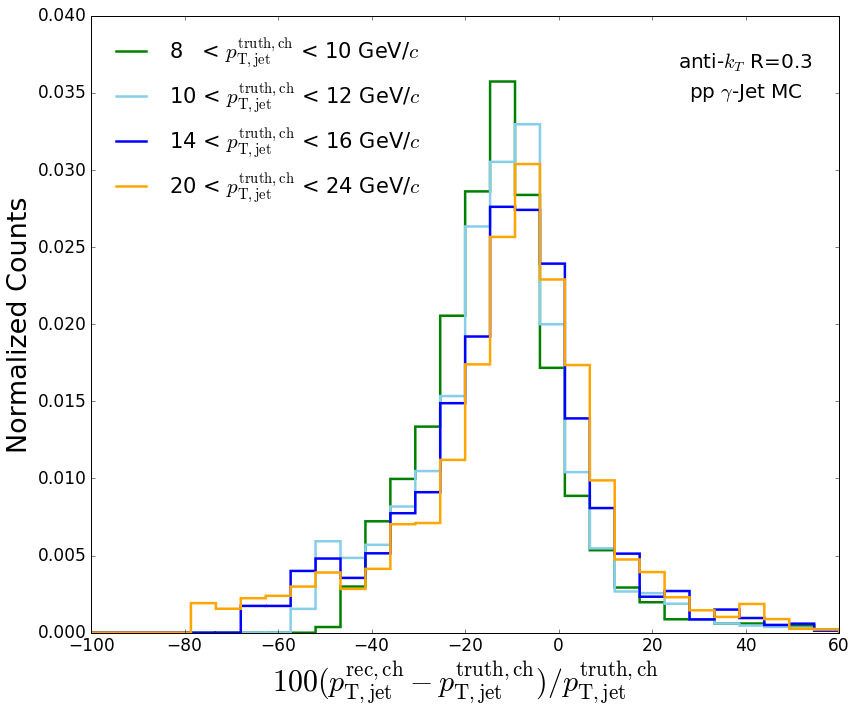

SD 8 < p^{truth}_T < 10 GeV: 15.4694468144
SD 10 < p^{truth}_T < 12 GeV: 17.1359101119
SD 14 < p^{truth}_T < 16 GeV: 19.5453682608
SD 20 < p^{truth}_T < 24 GeV: 22.0076603459


Mean 8 < p^{truth}_T < 10 GeV: -12.457322874
Mean 10 < p^{truth}_T < 12 GeV: -12.5294165104
Mean 14 < p^{truth}_T < 16 GeV: -12.3017184308
Mean 20 < p^{truth}_T < 24 GeV: -11.3899317539


In [20]:
graph_ptresol(R=0.3)

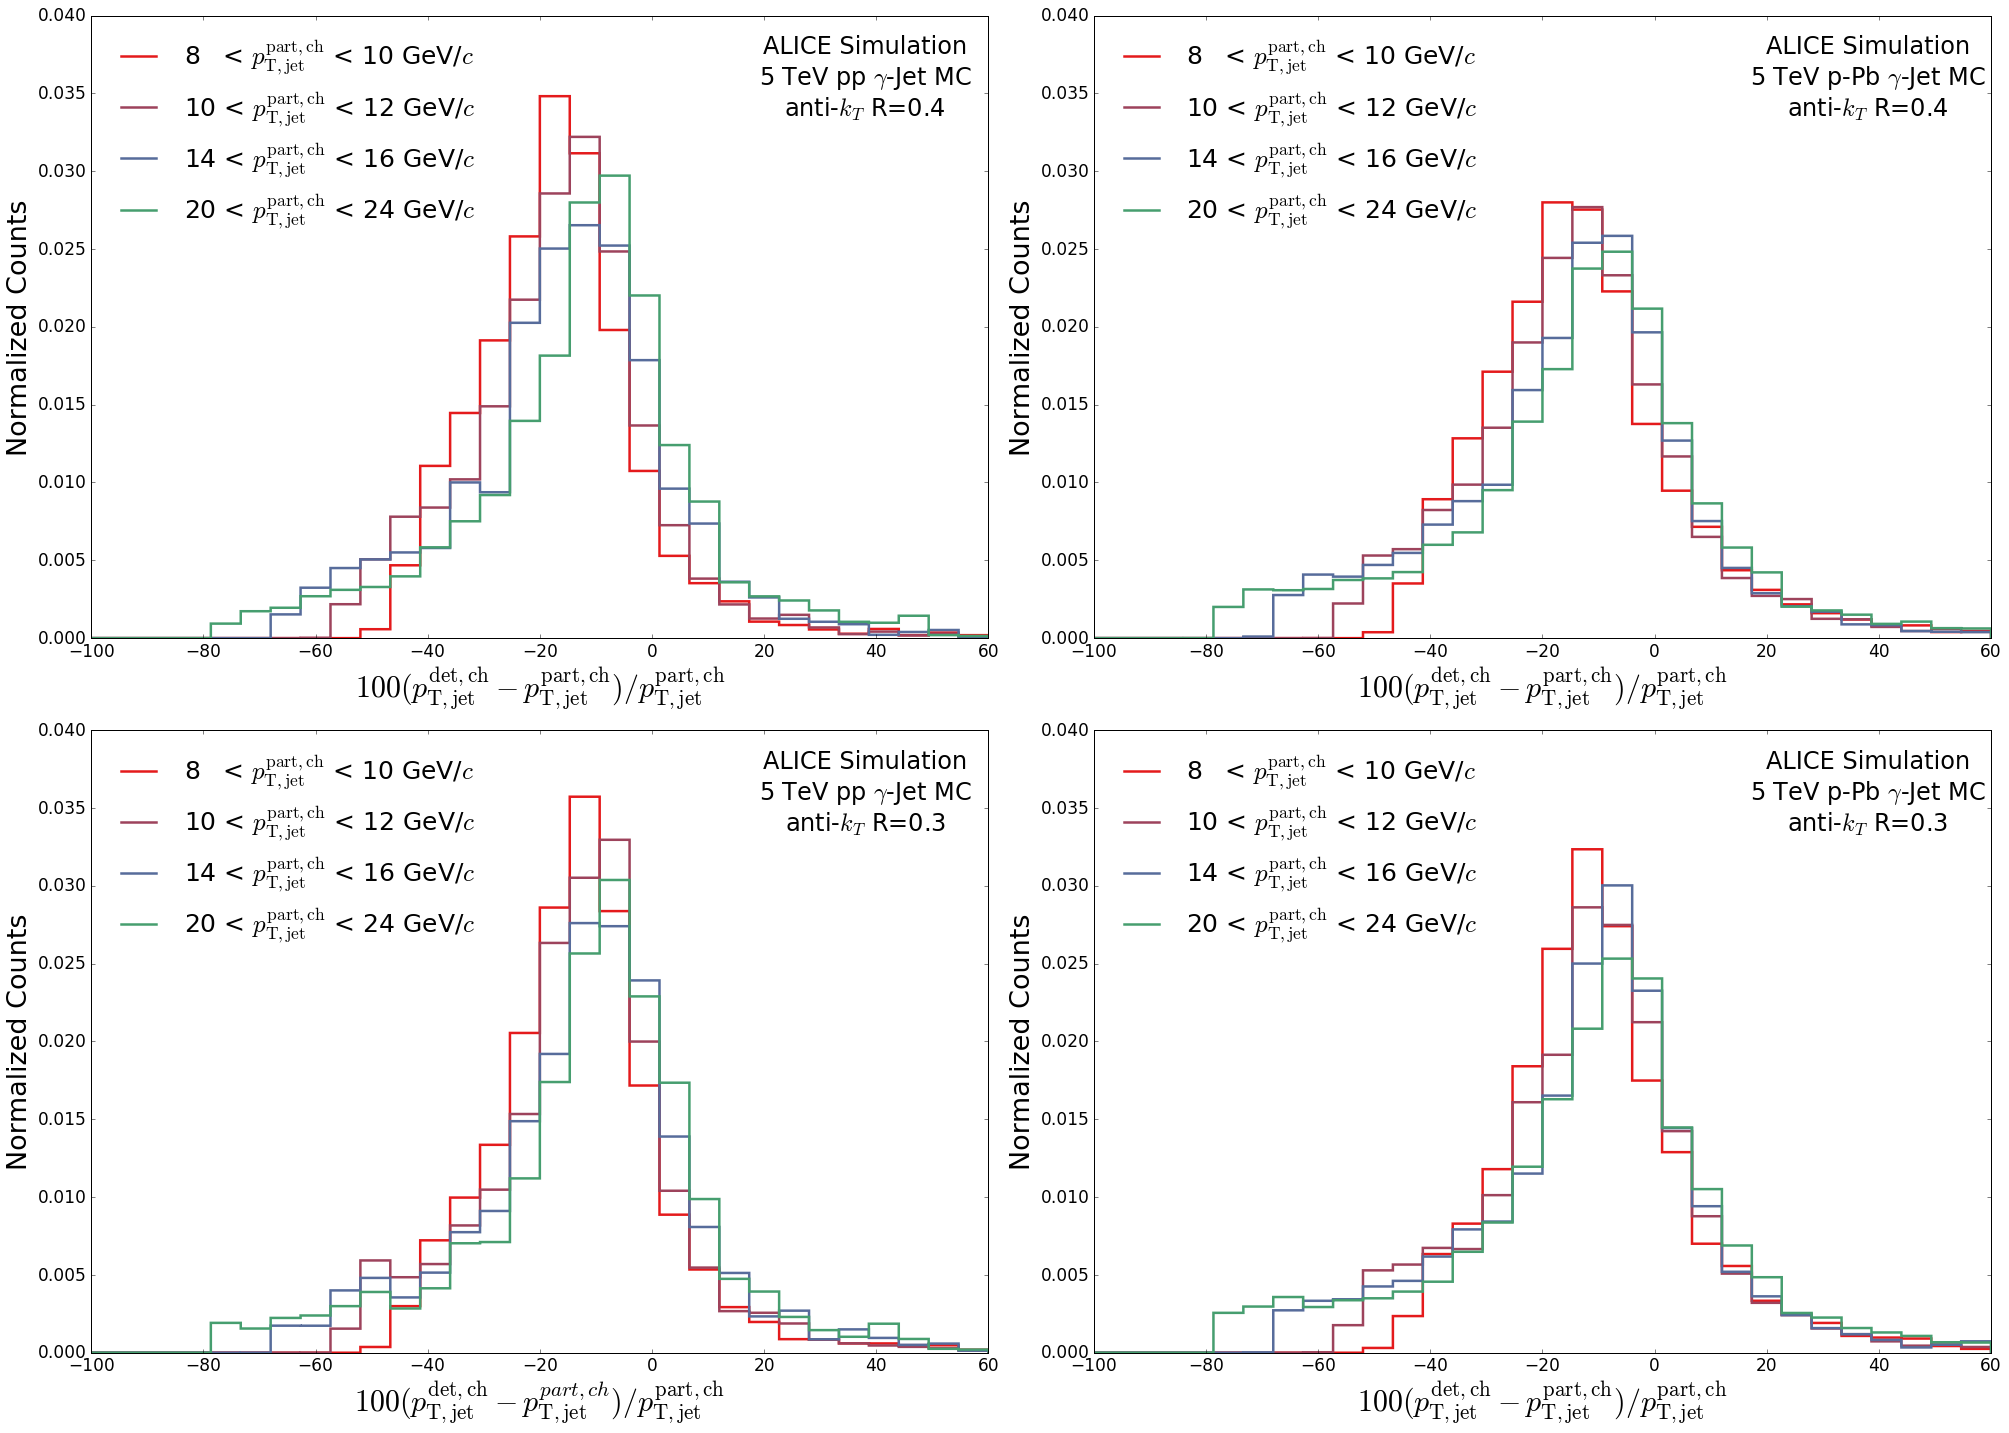

In [14]:
##########Colors##########

n = 20
colors = pl.cm.Set1(np.linspace(0,1,n))

##########################

#####Construct the figure#####

fig = plt.figure(figsize=(28,20))

plt.subplot(2,2,1)

plt.hist(mc_18b10a_Hists_04_pt_8['jet_ak04its_pt_resol'],bins=30,color=colors[0],linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_04_pt_8['weights'],histtype='step',normed=1)
plt.hist(mc_18b10a_Hists_04_pt_10['jet_ak04its_pt_resol'],bins=30,color=colors[1],linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_04_pt_10['weights'],histtype='step',normed=1)
plt.hist(mc_18b10a_Hists_04_pt_14['jet_ak04its_pt_resol'],bins=30,color=colors[2],linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_04_pt_14['weights'],histtype='step',normed=1)
plt.hist(mc_18b10a_Hists_04_pt_20['jet_ak04its_pt_resol'],bins=30,color=colors[4],linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_04_pt_20['weights'],histtype='step',normed=1)

#####Add labels to the figure#####

plt.xticks(fontsize=17)
plt.xlabel(r'$100 (p_\mathrm{T,jet}^\mathrm{det,ch} - p_\mathrm{T,jet}^\mathrm{part,ch})/p_\mathrm{T,jet}^\mathrm{part,ch}$',fontsize=30)
plt.yticks(fontsize=17)
plt.ylabel(r'Normalized Counts',fontsize=27)
plt.ylim(0,0.04)

plt.text(38,0.038,'ALICE Simulation',ha='center',va='center',fontsize=24)
plt.text(38,0.034,r'anti-$k_T$ R=0.4',ha='center',va='center',fontsize=24)
plt.text(38,0.036,r'5 TeV pp $\gamma$-Jet MC',ha='center',va='center',fontsize=24)

#####We want lines in our legend. So we do the following#####

handle1 = matplotlib.lines.Line2D([], [], c=colors[0], linewidth=2.5)
handle2 = matplotlib.lines.Line2D([], [], c=colors[1], linewidth=2.5)
handle3 = matplotlib.lines.Line2D([], [], c=colors[2], linewidth=2.5)
handle4 = matplotlib.lines.Line2D([], [], c=colors[4], linewidth=2.5)

label = [r'8 $\: \: \:$< $p_\mathrm{T,jet}^\mathrm{part,ch}$ < 10 GeV/$c$',r'10 < $p_\mathrm{T,jet}^\mathrm{part,ch}$ < 12 GeV/$c$',r'14 < $p_\mathrm{T,jet}^\mathrm{part,ch}$ < 16 GeV/$c$',r'20 < $p_\mathrm{T,jet}^\mathrm{part,ch}$ < 24 GeV/$c$']

plt.legend(handles=[handle1,handle2,handle3,handle4],labels=label,loc='upper left',prop={'size':25},frameon=False)

##################################

# plt.text(-70,0.025,r'RMS 8 $\: \: \:$< $p^{truth}_T$ < 10 GeV: 23$\%$',ha='center',va='center',fontsize=20)
# plt.text(-70,0.023,r'RMS 10 < $p^{truth}_T$ < 12 GeV: 24$\%$',ha='center',va='center',fontsize=20)
# plt.text(-70,0.021,r'RMS 14 < $p^{truth}_T$ < 16 GeV: 24$\%$',ha='center',va='center',fontsize=20)
# plt.text(-70,0.019,r'RMS 20 < $p^{truth}_T$ < 24 GeV: 25$\%$',ha='center',va='center',fontsize=20)

# plt.text(30,0.029,r'Mean 8 $\: \: \:$< $p^{truth}_T$ < 10 GeV: -16$\%$',ha='center',va='center',fontsize=20)
# plt.text(30,0.027,r'Mean 10 < $p^{truth}_T$ < 12 GeV: -16$\%$',ha='center',va='center',fontsize=20)
# plt.text(30,0.025,r'Mean 14 < $p^{truth}_T$ < 16 GeV: -15$\%$',ha='center',va='center',fontsize=20)
# plt.text(30,0.023,r'Mean 20 < $p^{truth}_T$ < 24 GeV: -14$\%$',ha='center',va='center',fontsize=20)
        
plt.subplot(2,2,2)

plt.hist(mc_17g6a1_Hists_04_pt_8['jet_ak04its_pt_resol'],bins=30,color=colors[0],linewidth=2.5,range=(-100,60),weights=mc_17g6a1_Hists_04_pt_8['weights'],histtype='step',normed=1)
plt.hist(mc_17g6a1_Hists_04_pt_10['jet_ak04its_pt_resol'],bins=30,color=colors[1],linewidth=2.5,range=(-100,60),weights=mc_17g6a1_Hists_04_pt_10['weights'],histtype='step',normed=1)
plt.hist(mc_17g6a1_Hists_04_pt_14['jet_ak04its_pt_resol'],bins=30,color=colors[2],linewidth=2.5,range=(-100,60),weights=mc_17g6a1_Hists_04_pt_14['weights'],histtype='step',normed=1)
plt.hist(mc_17g6a1_Hists_04_pt_20['jet_ak04its_pt_resol'],bins=30,color=colors[4],linewidth=2.5,range=(-100,60),weights=mc_17g6a1_Hists_04_pt_20['weights'],histtype='step',normed=1)

#####Add labels to the figure#####

plt.xticks(fontsize=17)
plt.xlabel(r'$100 (p_\mathrm{T,jet}^\mathrm{det,ch} - p_\mathrm{T,jet}^\mathrm{part,ch})/p_\mathrm{T,jet}^\mathrm{part,ch}$',fontsize=30)
plt.yticks(fontsize=17)
plt.ylabel(r'Normalized Counts',fontsize=27)
plt.ylim(0,0.04)

plt.text(38,0.038,'ALICE Simulation',ha='center',va='center',fontsize=24)
plt.text(38,0.034,r'anti-$k_T$ R=0.4',ha='center',va='center',fontsize=24)
plt.text(38,0.036,r'5 TeV p-Pb $\gamma$-Jet MC',ha='center',va='center',fontsize=24)

plt.legend(handles=[handle1,handle2,handle3,handle4],labels=label,loc='upper left',prop={'size':25},frameon=False)

# plt.text(-70,0.025,r'RMS 8 $\: \: \:$< $p^{truth}_T$ < 10 GeV: 22$\%$',ha='center',va='center',fontsize=20)
# plt.text(-70,0.023,r'RMS 10 < $p^{truth}_T$ < 12 GeV: 23$\%$',ha='center',va='center',fontsize=20)
# plt.text(-70,0.021,r'RMS 14 < $p^{truth}_T$ < 16 GeV: 25$\%$',ha='center',va='center',fontsize=20)
# plt.text(-70,0.019,r'RMS 20 < $p^{truth}_T$ < 24 GeV: 27$\%$',ha='center',va='center',fontsize=20)

# plt.text(30,0.029,r'Mean 8 $\: \: \:$< $p^{truth}_T$ < 10 GeV: -13$\%$',ha='center',va='center',fontsize=20)
# plt.text(30,0.027,r'Mean 10 < $p^{truth}_T$ < 12 GeV: -13$\%$',ha='center',va='center',fontsize=20)
# plt.text(30,0.025,r'Mean 14 < $p^{truth}_T$ < 16 GeV: -14$\%$',ha='center',va='center',fontsize=20)
# plt.text(30,0.023,r'Mean 20 < $p^{truth}_T$ < 24 GeV: -13$\%$',ha='center',va='center',fontsize=20)

##################################
        
plt.subplot(2,2,3)

plt.hist(mc_18b10a_Hists_03_pt_8['jet_ak03its_pt_resol'],bins=30,color=colors[0],linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_03_pt_8['weights'],histtype='step',normed=1)
plt.hist(mc_18b10a_Hists_03_pt_10['jet_ak03its_pt_resol'],bins=30,color=colors[1],linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_03_pt_10['weights'],histtype='step',normed=1)
plt.hist(mc_18b10a_Hists_03_pt_14['jet_ak03its_pt_resol'],bins=30,color=colors[2],linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_03_pt_14['weights'],histtype='step',normed=1)
plt.hist(mc_18b10a_Hists_03_pt_20['jet_ak03its_pt_resol'],bins=30,color=colors[4],linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_03_pt_20['weights'],histtype='step',normed=1)

#####Add labels to the figure#####

plt.xticks(fontsize=17)
plt.xlabel(r'$100 (p_\mathrm{T,jet}^\mathrm{det,ch} - p_\mathrm{T,jet}^{part,ch})/p_\mathrm{T,jet}^\mathrm{part,ch}$',fontsize=30)
plt.yticks(fontsize=17)
plt.ylabel(r'Normalized Counts',fontsize=27)
plt.ylim(0,0.04)

plt.text(38,0.038,'ALICE Simulation',ha='center',va='center',fontsize=24)
plt.text(38,0.034,r'anti-$k_T$ R=0.3',ha='center',va='center',fontsize=24)
plt.text(38,0.036,r'5 TeV pp $\gamma$-Jet MC',ha='center',va='center',fontsize=24)

plt.legend(handles=[handle1,handle2,handle3,handle4],labels=label,loc='upper left',prop={'size':25},frameon=False)

# plt.text(-70,0.029,r'RMS 8 $\: \: \:$< $p^{truth}_T$ < 10 GeV: 20$\%$',ha='center',va='center',fontsize=20)
# plt.text(-70,0.027,r'RMS 10 < $p^{truth}_T$ < 12 GeV: 21$\%$',ha='center',va='center',fontsize=20)
# plt.text(-70,0.025,r'RMS 14 < $p^{truth}_T$ < 16 GeV: 23$\%$',ha='center',va='center',fontsize=20)
# plt.text(-70,0.023,r'RMS 20 < $p^{truth}_T$ < 24 GeV: 25$\%$',ha='center',va='center',fontsize=20)

# plt.text(30,0.033,r'Mean 8 $\: \: \:$< $p^{truth}_T$ < 10 GeV: -12$\%$',ha='center',va='center',fontsize=20)
# plt.text(30,0.031,r'Mean 10 < $p^{truth}_T$ < 12 GeV: -13$\%$',ha='center',va='center',fontsize=20)
# plt.text(30,0.029,r'Mean 14 < $p^{truth}_T$ < 16 GeV: -12$\%$',ha='center',va='center',fontsize=20)
# plt.text(30,0.027,r'Mean 20 < $p^{truth}_T$ < 24 GeV: -11$\%$',ha='center',va='center',fontsize=20)

##################################

plt.subplot(2,2,4)

plt.hist(mc_17g6a1_Hists_03_pt_8['jet_ak03its_pt_resol'],bins=30,color=colors[0],linewidth=2.5,range=(-100,60),weights=mc_17g6a1_Hists_03_pt_8['weights'],histtype='step',normed=1)
plt.hist(mc_17g6a1_Hists_03_pt_10['jet_ak03its_pt_resol'],bins=30,color=colors[1],linewidth=2.5,range=(-100,60),weights=mc_17g6a1_Hists_03_pt_10['weights'],histtype='step',normed=1)
plt.hist(mc_17g6a1_Hists_03_pt_14['jet_ak03its_pt_resol'],bins=30,color=colors[2],linewidth=2.5,range=(-100,60),weights=mc_17g6a1_Hists_03_pt_14['weights'],histtype='step',normed=1)
plt.hist(mc_17g6a1_Hists_03_pt_20['jet_ak03its_pt_resol'],bins=30,color=colors[4],linewidth=2.5,range=(-100,60),weights=mc_17g6a1_Hists_03_pt_20['weights'],histtype='step',normed=1)

#####Add labels to the figure#####

plt.xticks(fontsize=17)
plt.xlabel(r'$100 (p_\mathrm{T,jet}^\mathrm{det,ch} - p_\mathrm{T,jet}^\mathrm{part,ch})/p_\mathrm{T,jet}^\mathrm{part,ch}$',fontsize=30)
plt.yticks(fontsize=17)
plt.ylabel(r'Normalized Counts',fontsize=27)
plt.ylim(0,0.04)

plt.text(38,0.038,'ALICE Simulation',ha='center',va='center',fontsize=24)
plt.text(38,0.034,r'anti-$k_T$ R=0.3',ha='center',va='center',fontsize=24)
plt.text(38,0.036,r'5 TeV p-Pb $\gamma$-Jet MC',ha='center',va='center',fontsize=24)

plt.legend(handles=[handle1,handle2,handle3,handle4],labels=label,loc='upper left',prop={'size':25},frameon=False)

# plt.text(-70,0.029,r'RMS 8 $\: \: \:$< $p^{truth}_T$ < 10 GeV: 20$\%$',ha='center',va='center',fontsize=20)
# plt.text(-70,0.027,r'RMS 10 < $p^{truth}_T$ < 12 GeV: 22$\%$',ha='center',va='center',fontsize=20)
# plt.text(-70,0.025,r'RMS 14 < $p^{truth}_T$ < 16 GeV: 25$\%$',ha='center',va='center',fontsize=20)
# plt.text(-70,0.023,r'RMS 20 < $p^{truth}_T$ < 24 GeV: 27$\%$',ha='center',va='center',fontsize=20)

# plt.text(30,0.033,r'Mean 8 $\: \: \:$< $p^{truth}_T$ < 10 GeV: -10$\%$',ha='center',va='center',fontsize=20)
# plt.text(30,0.031,r'Mean 10 < $p^{truth}_T$ < 12 GeV: -11$\%$',ha='center',va='center',fontsize=20)
# plt.text(30,0.029,r'Mean 14 < $p^{truth}_T$ < 16 GeV: -12$\%$',ha='center',va='center',fontsize=20)
# plt.text(30,0.027,r'Mean 20 < $p^{truth}_T$ < 24 GeV: -12$\%$',ha='center',va='center',fontsize=20)

##################################

fig.tight_layout()
plt.show()
fig.savefig('jet_pt_resol_GJ.pdf')

In [15]:
##########Remove any outliers that the RMS is sensative to (for p-Pb)##########

mc_17g6a1_Hist_04_pt_8 =  mc_17g6a1_Hists_04_pt_8.query('jet_ak04its_pt_resol > -80 and jet_ak04its_pt_resol < 60')
mc_17g6a1_Hist_04_pt_10 = mc_17g6a1_Hists_04_pt_10.query('jet_ak04its_pt_resol > -80 and jet_ak04its_pt_resol < 60')
mc_17g6a1_Hist_04_pt_14 = mc_17g6a1_Hists_04_pt_14.query('jet_ak04its_pt_resol > -80 and jet_ak04its_pt_resol < 60')
mc_17g6a1_Hist_04_pt_20 = mc_17g6a1_Hists_04_pt_20.query('jet_ak04its_pt_resol > -80 and jet_ak04its_pt_resol < 60')

mc_17g6a1_Hist_03_pt_8 =  mc_17g6a1_Hists_03_pt_8.query('jet_ak03its_pt_resol > -80 and jet_ak03its_pt_resol < 60')
mc_17g6a1_Hist_03_pt_10 = mc_17g6a1_Hists_03_pt_10.query('jet_ak03its_pt_resol > -80 and jet_ak03its_pt_resol < 60')
mc_17g6a1_Hist_03_pt_14 = mc_17g6a1_Hists_03_pt_14.query('jet_ak03its_pt_resol > -80 and jet_ak03its_pt_resol < 60')
mc_17g6a1_Hist_03_pt_20 = mc_17g6a1_Hists_03_pt_20.query('jet_ak03its_pt_resol > -80 and jet_ak03its_pt_resol < 60')

##########Calculate the SD##########

print 'SD 8 < p^{truth}_T < 10 GeV:', np.std(mc_17g6a1_Hist_04_pt_8['jet_ak04its_pt_resol'])
print 'SD 10 < p^{truth}_T < 12 GeV:', np.std(mc_17g6a1_Hist_04_pt_10['jet_ak04its_pt_resol'])
print 'SD 14 < p^{truth}_T < 16 GeV:', np.std(mc_17g6a1_Hist_04_pt_14['jet_ak04its_pt_resol'])
print 'SD 20 < p^{truth}_T < 24 GeV:', np.std(mc_17g6a1_Hist_04_pt_20['jet_ak04its_pt_resol'])
print '\n'

##########Calculate the mean##########

print 'Mean 8 < p^{truth}_T < 10 GeV:', np.mean(mc_17g6a1_Hist_04_pt_8['jet_ak04its_pt_resol'])
print 'Mean 10 < p^{truth}_T < 12 GeV:', np.mean(mc_17g6a1_Hist_04_pt_10['jet_ak04its_pt_resol'])
print 'Mean 14 < p^{truth}_T < 16 GeV:', np.mean(mc_17g6a1_Hist_04_pt_14['jet_ak04its_pt_resol'])
print 'Mean 20 < p^{truth}_T < 24 GeV:', np.mean(mc_17g6a1_Hist_04_pt_20['jet_ak04its_pt_resol'])

##########Calculate the SD##########

print '\n'
print 'STD 8 < p^{truth}_T < 10 GeV (0.3):', np.std(mc_17g6a1_Hist_03_pt_8['jet_ak03its_pt_resol'])
print 'STD 10 < p^{truth}_T < 12 GeV (0.3):', np.std(mc_17g6a1_Hist_03_pt_10['jet_ak03its_pt_resol'])
print 'STD 14 < p^{truth}_T < 16 GeV (0.3):', np.std(mc_17g6a1_Hist_03_pt_14['jet_ak03its_pt_resol'])
print 'STD 20 < p^{truth}_T < 24 GeV (0.3):', np.std(mc_17g6a1_Hist_03_pt_20['jet_ak03its_pt_resol'])
print '\n'

##########Calculate the mean##########

print 'Mean 8 < p^{truth}_T < 10 GeV (0.3):', np.mean(mc_17g6a1_Hist_03_pt_8['jet_ak03its_pt_resol'])
print 'Mean 10 < p^{truth}_T < 12 GeV (0.3):', np.mean(mc_17g6a1_Hist_03_pt_10['jet_ak03its_pt_resol'])
print 'Mean 14 < p^{truth}_T < 16 GeV (0.3):', np.mean(mc_17g6a1_Hist_03_pt_14['jet_ak03its_pt_resol'])
print 'Mean 20 < p^{truth}_T < 24 GeV (0.3):', np.mean(mc_17g6a1_Hist_03_pt_20['jet_ak03its_pt_resol'])

SD 8 < p^{truth}_T < 10 GeV: 17.6912902399
SD 10 < p^{truth}_T < 12 GeV: 19.0936864523
SD 14 < p^{truth}_T < 16 GeV: 21.1153888858
SD 20 < p^{truth}_T < 24 GeV: 23.5762553985


Mean 8 < p^{truth}_T < 10 GeV: -12.865200707
Mean 10 < p^{truth}_T < 12 GeV: -13.2980322987
Mean 14 < p^{truth}_T < 16 GeV: -13.8222517859
Mean 20 < p^{truth}_T < 24 GeV: -13.3034873381


STD 8 < p^{truth}_T < 10 GeV (0.3): 17.089360822
STD 10 < p^{truth}_T < 12 GeV (0.3): 18.8315633043
STD 14 < p^{truth}_T < 16 GeV (0.3): 21.5933970645
STD 20 < p^{truth}_T < 24 GeV (0.3): 23.9147080692


Mean 8 < p^{truth}_T < 10 GeV (0.3): -9.59343038579
Mean 10 < p^{truth}_T < 12 GeV (0.3): -10.6301060723
Mean 14 < p^{truth}_T < 16 GeV (0.3): -11.5898183837
Mean 20 < p^{truth}_T < 24 GeV (0.3): -11.8753000776


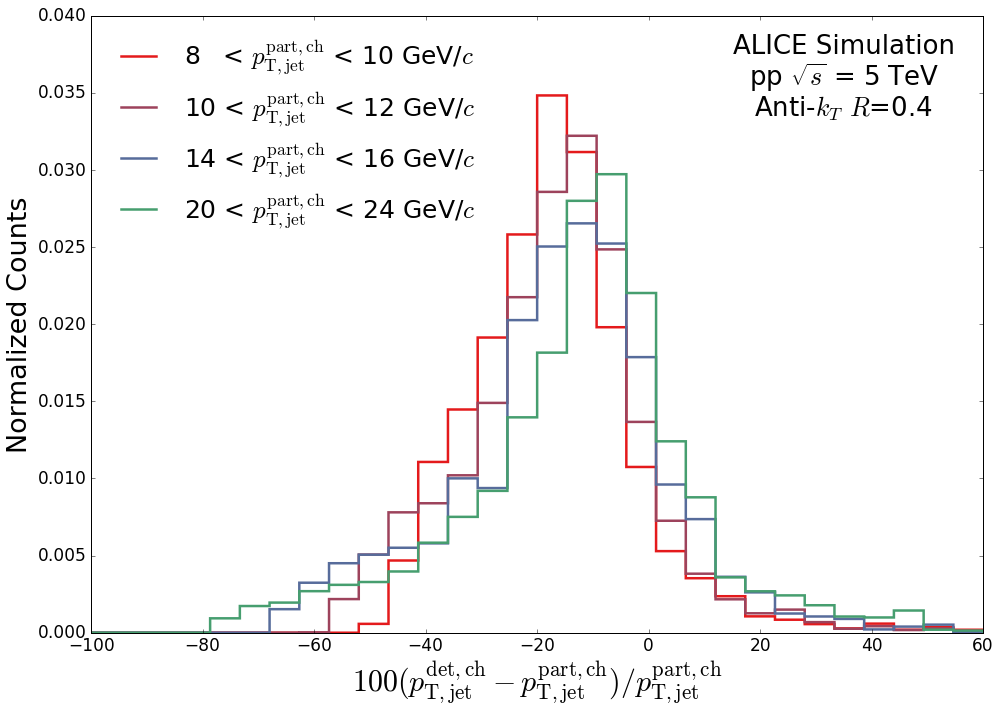

In [16]:
#####Construct the figure#####

fig = plt.figure(figsize=(14,10))

plt.hist(mc_18b10a_Hists_04_pt_8['jet_ak04its_pt_resol'],bins=30,color=colors[0],linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_04_pt_8['weights'],histtype='step',normed=1)
plt.hist(mc_18b10a_Hists_04_pt_10['jet_ak04its_pt_resol'],bins=30,color=colors[1],linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_04_pt_10['weights'],histtype='step',normed=1)
plt.hist(mc_18b10a_Hists_04_pt_14['jet_ak04its_pt_resol'],bins=30,color=colors[2],linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_04_pt_14['weights'],histtype='step',normed=1)
plt.hist(mc_18b10a_Hists_04_pt_20['jet_ak04its_pt_resol'],bins=30,color=colors[4],linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_04_pt_20['weights'],histtype='step',normed=1)

#####Add labels to the figure#####

plt.xticks(fontsize=17)
plt.xlabel(r'$100 (p_\mathrm{T,jet}^\mathrm{det,ch} - p_\mathrm{T,jet}^\mathrm{part,ch})/p_\mathrm{T,jet}^\mathrm{part,ch}$',fontsize=30)
plt.yticks(fontsize=17)
plt.ylabel(r'Normalized Counts',fontsize=27)
plt.ylim(0,0.04)

plt.text(35,0.038,'ALICE Simulation',ha='center',va='center',fontsize=26)
plt.text(35,0.034,r'Anti-$k_T$ $R$=0.4',ha='center',va='center',fontsize=26)
plt.text(35,0.036,r'pp $\sqrt{s}$ = 5 TeV',ha='center',va='center',fontsize=26)

#####We want lines in our legend. So we do the following#####

handle1 = matplotlib.lines.Line2D([], [], c=colors[0], linewidth=2.5)
handle2 = matplotlib.lines.Line2D([], [], c=colors[1], linewidth=2.5)
handle3 = matplotlib.lines.Line2D([], [], c=colors[2], linewidth=2.5)
handle4 = matplotlib.lines.Line2D([], [], c=colors[4], linewidth=2.5)

label = [r'8 $\: \: \:$< $p_\mathrm{T,jet}^\mathrm{part,ch}$ < 10 GeV/$c$',r'10 < $p_\mathrm{T,jet}^\mathrm{part,ch}$ < 12 GeV/$c$',r'14 < $p_\mathrm{T,jet}^\mathrm{part,ch}$ < 16 GeV/$c$',r'20 < $p_\mathrm{T,jet}^\mathrm{part,ch}$ < 24 GeV/$c$']

plt.legend(handles=[handle1,handle2,handle3,handle4],labels=label,loc='upper left',prop={'size':25},frameon=False)

##################################

fig.tight_layout()
plt.show()
fig.savefig('jet_pt_resol_pp_04.pdf')

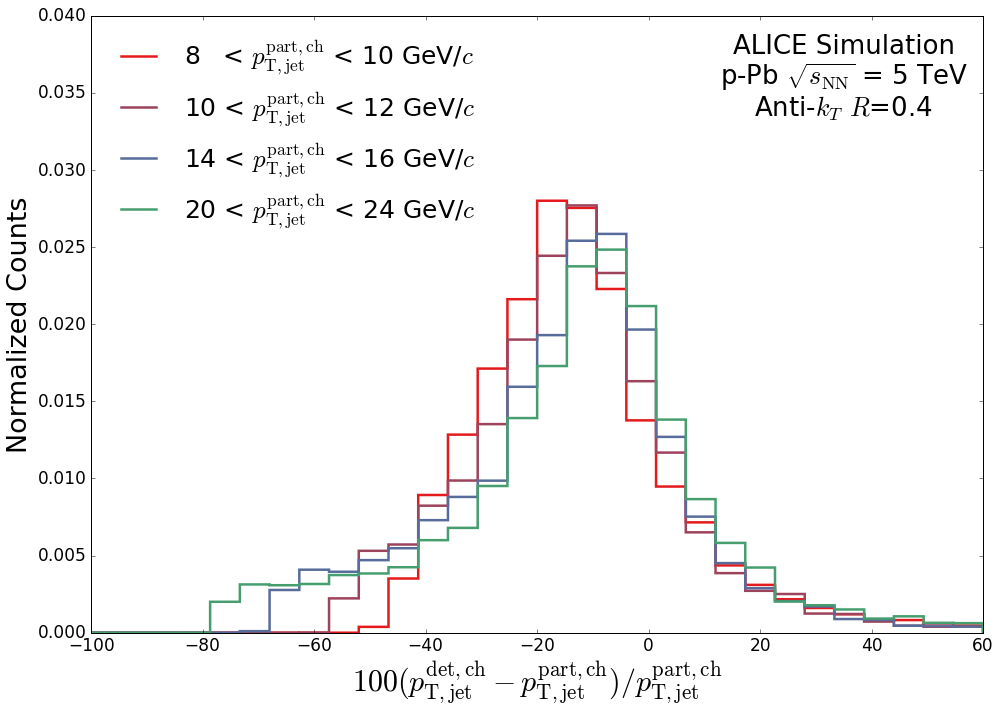

In [17]:
#####Construct the figure#####

fig = plt.figure(figsize=(14,10))

plt.hist(mc_17g6a1_Hists_04_pt_8['jet_ak04its_pt_resol'],bins=30,color=colors[0],linewidth=2.5,range=(-100,60),weights=mc_17g6a1_Hists_04_pt_8['weights'],histtype='step',normed=1,label=r'8 $\: \: \:$< $p_\mathrm{T,ch \: jet}^{part}$ < 10 GeV/$c$')
plt.hist(mc_17g6a1_Hists_04_pt_10['jet_ak04its_pt_resol'],bins=30,color=colors[1],linewidth=2.5,range=(-100,60),weights=mc_17g6a1_Hists_04_pt_10['weights'],histtype='step',normed=1,label=r'10 < $p_\mathrm{T,ch \: jet}^{part}$ < 12 GeV/$c$')
plt.hist(mc_17g6a1_Hists_04_pt_14['jet_ak04its_pt_resol'],bins=30,color=colors[2],linewidth=2.5,range=(-100,60),weights=mc_17g6a1_Hists_04_pt_14['weights'],histtype='step',normed=1,label=r'14 < $p_\mathrm{T,ch \: jet}^{part}$ < 16 GeV/$c$')
plt.hist(mc_17g6a1_Hists_04_pt_20['jet_ak04its_pt_resol'],bins=30,color=colors[4],linewidth=2.5,range=(-100,60),weights=mc_17g6a1_Hists_04_pt_20['weights'],histtype='step',normed=1,label=r'20 < $p_\mathrm{T,ch \: jet}^{part}$ < 24 GeV/$c$')

#####Add labels to the figure#####

plt.xticks(fontsize=17)
plt.xlabel(r'$100 (p_\mathrm{T,jet}^\mathrm{det,ch} - p_\mathrm{T,jet}^\mathrm{part,ch})/p_\mathrm{T,jet}^\mathrm{part,ch}$',fontsize=30)
plt.yticks(fontsize=17)
plt.ylabel(r'Normalized Counts',fontsize=27)
plt.ylim(0,0.04)

plt.text(35,0.038,'ALICE Simulation',ha='center',va='center',fontsize=26)
plt.text(35,0.034,r'Anti-$k_T$ $R$=0.4',ha='center',va='center',fontsize=26)
plt.text(35,0.036,r'p-Pb $\sqrt{s_{\mathrm{NN}}}$ = 5 TeV',ha='center',va='center',fontsize=26)
plt.legend(handles=[handle1,handle2,handle3,handle4],labels=label,loc='upper left',prop={'size':25},frameon=False)

##################################

fig.tight_layout()
plt.show()
fig.savefig('jet_pt_resol_pPb_04.pdf')

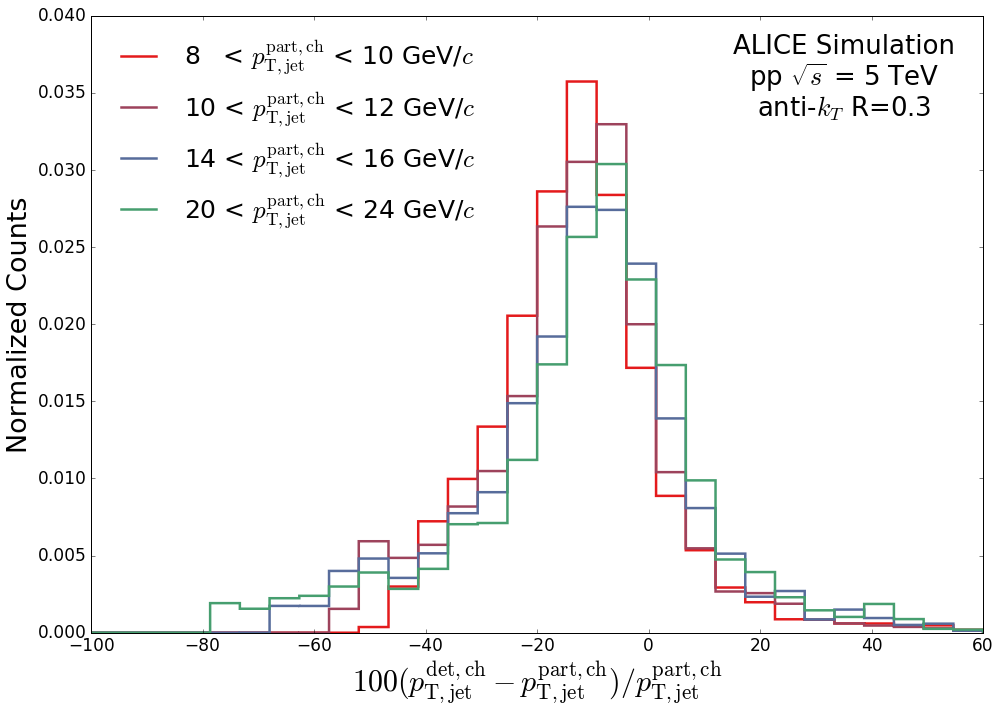

In [18]:
#####Construct the figure#####

fig = plt.figure(figsize=(14,10))

plt.hist(mc_18b10a_Hists_03_pt_8['jet_ak03its_pt_resol'],bins=30,color=colors[0],linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_03_pt_8['weights'],histtype='step',normed=1,label=r'8 $\: \: \:$< $p_\mathrm{T,ch \: jet}^{part}$ < 10 GeV/$c$')
plt.hist(mc_18b10a_Hists_03_pt_10['jet_ak03its_pt_resol'],bins=30,color=colors[1],linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_03_pt_10['weights'],histtype='step',normed=1,label=r'10 < $p_\mathrm{T,ch \: jet}^{part}$ < 12 GeV/$c$')
plt.hist(mc_18b10a_Hists_03_pt_14['jet_ak03its_pt_resol'],bins=30,color=colors[2],linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_03_pt_14['weights'],histtype='step',normed=1,label=r'14 < $p_\mathrm{T,ch \: jet}^{part}$ < 16 GeV/$c$')
plt.hist(mc_18b10a_Hists_03_pt_20['jet_ak03its_pt_resol'],bins=30,color=colors[4],linewidth=2.5,range=(-100,60),weights=mc_18b10a_Hists_03_pt_20['weights'],histtype='step',normed=1,label=r'20 < $p_\mathrm{T,ch \: jet}^{part}$ < 24 GeV/$c$')

#####Add labels to the figure#####

plt.xticks(fontsize=17)
plt.xlabel(r'$100 (p_\mathrm{T,jet}^\mathrm{det,ch} - p_\mathrm{T,jet}^\mathrm{part,ch})/p_\mathrm{T,jet}^\mathrm{part,ch}$',fontsize=30)
plt.yticks(fontsize=17)
plt.ylabel(r'Normalized Counts',fontsize=27)
plt.ylim(0,0.04)


plt.text(35,0.038,'ALICE Simulation',ha='center',va='center',fontsize=26)
plt.text(35,0.034,r'anti-$k_T$ R=0.3',ha='center',va='center',fontsize=26)
plt.text(35,0.036,r'pp $\sqrt{s}$ = 5 TeV',ha='center',va='center',fontsize=26)
plt.legend(handles=[handle1,handle2,handle3,handle4],labels=label,loc='upper left',prop={'size':25},frameon=False)

##################################

fig.tight_layout()
plt.show()
fig.savefig('jet_pt_resol_pp_03.pdf')

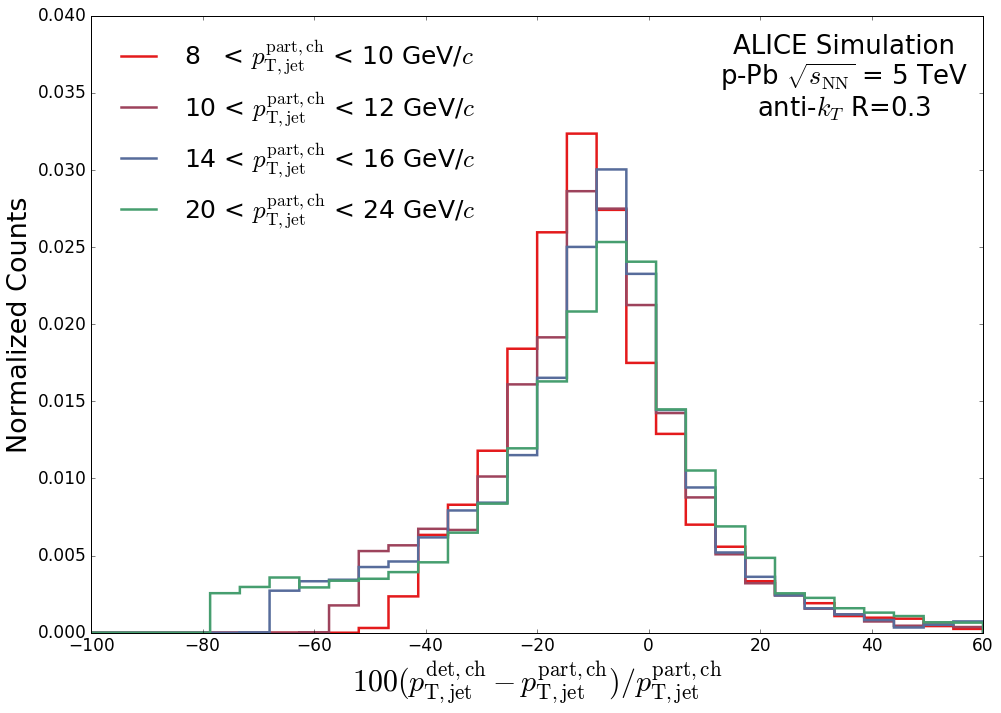

In [19]:
#####Construct the figure#####

fig = plt.figure(figsize=(14,10))

plt.hist(mc_17g6a1_Hists_03_pt_8['jet_ak03its_pt_resol'],bins=30,color=colors[0],linewidth=2.5,range=(-100,60),weights=mc_17g6a1_Hists_03_pt_8['weights'],histtype='step',normed=1,label=r'8 $\: \: \:$< $p_\mathrm{T,ch \: jet}^{part}$ < 10 GeV/$c$')
plt.hist(mc_17g6a1_Hists_03_pt_10['jet_ak03its_pt_resol'],bins=30,color=colors[1],linewidth=2.5,range=(-100,60),weights=mc_17g6a1_Hists_03_pt_10['weights'],histtype='step',normed=1,label=r'10 < $p_\mathrm{T,ch \: jet}^{part}$ < 12 GeV/$c$')
plt.hist(mc_17g6a1_Hists_03_pt_14['jet_ak03its_pt_resol'],bins=30,color=colors[2],linewidth=2.5,range=(-100,60),weights=mc_17g6a1_Hists_03_pt_14['weights'],histtype='step',normed=1,label=r'14 < $p_\mathrm{T,ch \: jet}^{part}$ < 16 GeV/$c$')
plt.hist(mc_17g6a1_Hists_03_pt_20['jet_ak03its_pt_resol'],bins=30,color=colors[4],linewidth=2.5,range=(-100,60),weights=mc_17g6a1_Hists_03_pt_20['weights'],histtype='step',normed=1,label=r'20 < $p_\mathrm{T,ch \: jet}^{part}$ < 24 GeV/$c$')

#####Add labels to the figure#####

plt.xticks(fontsize=17)
plt.xlabel(r'$100 (p_\mathrm{T,jet}^\mathrm{det,ch} - p_\mathrm{T,jet}^\mathrm{part,ch})/p_\mathrm{T,jet}^\mathrm{part,ch}$',fontsize=30)
plt.yticks(fontsize=17)
plt.ylabel(r'Normalized Counts',fontsize=27)
plt.ylim(0,0.04)


plt.text(35,0.038,'ALICE Simulation',ha='center',va='center',fontsize=26)
plt.text(35,0.034,r'anti-$k_T$ R=0.3',ha='center',va='center',fontsize=26)
plt.text(35,0.036,r'p-Pb $\sqrt{s_{\mathrm{NN}}}$ = 5 TeV',ha='center',va='center',fontsize=26)
plt.legend(handles=[handle1,handle2,handle3,handle4],labels=label,loc='upper left',prop={'size':25},frameon=False)

##################################

fig.tight_layout()
plt.show()
fig.savefig('jet_pt_resol_pPb_03.pdf')